# Librerias

In [1]:
#librerias
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""datos faltantes"""
import missingno as msno
"""imputacion de datos"""
from sklearn.impute import SimpleImputer

# Funciones

In [3]:
"""funcion para eliminar datos innecesarios"""
def eliminar_filasvaloresDesconocidos(_daframe:pd.DataFrame, _dfilasConsulta:pd.DataFrame):
    filas_eliminar=[]
    for index, fila in _dfilasConsulta.iterrows():
        filas_eliminar.append(index)
        """eliminar registros de filas almacenados """
    _daframe.drop(filas_eliminar, axis=0, inplace=True)

# Importacion de datos

In [4]:
df_dos = pd.read_csv('../../datos_SDN/araData/Dos.csv', low_memory=False)

# 1. Limpieza de datos

#### Caracteristicas

In [5]:
"""definir caractericticas innecesarias"""
caracteristicas_in=['SrcId','Rank','Trans','sDSb','dDSb','sIpId','dIpId','SrcGap','DstGap','dsPkts','ddPkts','dsBytes',
'ddBytes','pdsPkt','pddPkt','pdsByte','pddByte','(null)','SrcWin','DstWin','JDelay','LDelay','Bins','Bin', 'SrcTCPBase','DstTCPBase'
,'Inode','sPktSz','dPktSz']

In [6]:
df_dos.drop(columns=caracteristicas_in, axis=1, inplace=True)

In [8]:
df_dos.shape

(35030, 93)

#### Protocolos

In [9]:
"""verificiar protocolos para trafico DoS"""
df_dos.Proto.unique()

array(['man', 'tcp', 'udp', 'ipv6-icmp', 'igmp', 'icmp', 'lldp'],
      dtype=object)

In [10]:
df_dos.Proto.value_counts()

tcp          34873
udp            111
man             36
igmp             5
ipv6-icmp        2
icmp             2
lldp             1
Name: Proto, dtype: int64

In [11]:
"""Eliminacion de protocolos innecesarios"""
df_dos=df_dos[(df_dos.Proto=='tcp')| (df_dos.Proto=='udp')]

En este se ha procedido eliminar el protocolo ICMP debido a que presenta unicamente 2 registros.

In [13]:
df_dos.Proto.value_counts()

tcp    34873
udp      111
Name: Proto, dtype: int64

In [12]:
df_dos.shape

(34984, 93)

#### Duracion de flujos

In [14]:
duracion = df_dos[(df_dos.RunTime==0.0) | (df_dos.Dur==0.0)]
df_dos[(df_dos.RunTime==0.0) | (df_dos.Dur==0.0)]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
337,13:13:00.814769,13:13:00.814769,13:13:00.814769,19:00:00.000000,13:13:00.814769,19:00:00.000000,2,e,0.0,0.0,...,0.003392,Mws T,51816,66.0,0.0,66.0,NaN,66.0,NaN,Dos
338,13:13:00.814870,13:13:00.814870,13:13:00.814870,19:00:00.000000,13:13:00.814870,19:00:00.000000,3,e,0.0,0.0,...,0.002805,Mws T,52044,66.0,0.0,66.0,NaN,66.0,NaN,Dos
339,13:13:00.814890,13:13:00.814890,13:13:00.814890,19:00:00.000000,13:13:00.814890,19:00:00.000000,4,e,0.0,0.0,...,0.007383,Mws T,52272,66.0,0.0,66.0,NaN,66.0,NaN,Dos
340,13:13:00.814903,13:13:00.814903,13:13:00.814903,19:00:00.000000,13:13:00.814903,19:00:00.000000,5,e,0.0,0.0,...,0.002580,Mws T,52500,66.0,0.0,66.0,NaN,66.0,NaN,Dos
341,13:13:00.814916,13:13:00.814916,13:13:00.814916,19:00:00.000000,13:13:00.814916,19:00:00.000000,6,e,0.0,0.0,...,0.002220,Mws T,52728,66.0,0.0,66.0,NaN,66.0,NaN,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34872,17:26:27.374600,17:26:27.374600,17:26:27.374600,19:00:00.000000,17:26:27.374600,19:00:00.000000,34,e s,0.0,0.0,...,0.000000,Mws T,44864,74.0,0.0,74.0,NaN,74.0,NaN,Dos
34877,17:26:29.422350,17:26:29.422350,17:26:29.422350,19:00:00.000000,17:26:29.422350,19:00:00.000000,43,e s,0.0,0.0,...,0.000000,Mws T,46344,74.0,0.0,74.0,NaN,74.0,NaN,Dos
34878,17:26:29.422773,17:26:29.422773,17:26:29.422773,19:00:00.000000,17:26:29.422773,19:00:00.000000,42,e s,0.0,0.0,...,0.000000,Mws T,46592,74.0,0.0,74.0,NaN,74.0,NaN,Dos
34879,17:26:29.422792,17:26:29.422792,17:26:29.422792,19:00:00.000000,17:26:29.422792,19:00:00.000000,41,e s,0.0,0.0,...,0.000000,Mws T,46840,74.0,0.0,74.0,NaN,74.0,NaN,Dos


No se eliminan los flujos con duracion y tiempo de ejecucion con 0 sec, porque en los ataques DoS porque en el establecimiento de comunciacion handshake, el cliente puede enviar varias solicitudes sin confirmar las que envia el servidor.

### Eliminacion de flujos con direccion IPv6 Link-Local

In [15]:
df_dos.SrcAddr.unique()

array(['200.175.2.130', '192.168.8.128', '192.168.8.129', '192.168.8.1',
       'fe80::a9c8:a7bc:187d:eb55'], dtype=object)

In [17]:
df_dos[(df_dos.SrcAddr=="fe80::a9c8:a7bc:187d:eb55") ]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
24268,13:03:55.007616,13:03:55.014944,13:03:55.007616,19:00:00.000000,13:03:55.014944,19:00:00.000000,12,e,0.007328,0.007328,...,0.0,NaN,3336,119.0,0.0,138.0,NaN,100.0,NaN,Dos
24269,13:03:55.014137,13:03:55.014137,13:03:55.014137,19:00:00.000000,13:03:55.014137,19:00:00.000000,13,e,0.000000,0.000000,...,0.0,NaN,3504,94.0,0.0,94.0,NaN,94.0,NaN,Dos


In [18]:
eliminar_filasvaloresDesconocidos(df_dos,df_dos[(df_dos.SrcAddr=="fe80::a9c8:a7bc:187d:eb55") ])

## 1.2 Eliminar valores duplicados

In [20]:
df_dos.duplicated().sum()

0

## 1.3 Revisar variables Redundantes

In [22]:
df_dos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34982 entries, 1 to 35028
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StartTime     34982 non-null  object 
 1   LastTime      34982 non-null  object 
 2   SrcStartTime  34982 non-null  object 
 3   DstStartTime  34982 non-null  object 
 4   SrcLastTime   34982 non-null  object 
 5   DstLastTime   34982 non-null  object 
 6   Seq           34982 non-null  int64  
 7   Flgs          34982 non-null  object 
 8   RunTime       34982 non-null  float64
 9   Dur           34982 non-null  float64
 10  SrcDur        34982 non-null  float64
 11  DstDur        34982 non-null  float64
 12  Mean          34982 non-null  float64
 13  StdDev        34982 non-null  float64
 14  Sum           34982 non-null  float64
 15  Min           34982 non-null  float64
 16  Max           34982 non-null  float64
 17  Dir           34982 non-null  object 
 18  SrcAddr       34982 non-nu

In [24]:
"""caracteristicas relacionadas con temporarizadores de flujo"""
df_dos.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15,16]]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max
1,13:03:32.178768,13:03:32.219546,13:03:32.178768,13:03:32.178796,13:03:32.219538,13:03:32.219546,0.040778,0.040778,0.040770,0.040750,0.040778,0.0,0.040778,0.040778,0.040778
2,13:03:32.178911,13:03:42.215561,13:03:32.178911,13:03:32.178944,13:03:42.215551,13:03:42.215561,10.036650,10.036650,10.036640,10.036617,10.036650,0.0,10.036650,10.036650,10.036650
3,13:03:32.198610,13:03:42.215701,13:03:32.198610,13:03:32.198623,13:03:42.215694,13:03:42.215701,10.017091,10.017091,10.017084,10.017078,10.017091,0.0,10.017091,10.017091,10.017091
4,13:03:32.218931,13:03:42.215759,13:03:32.218931,13:03:32.218945,13:03:42.215756,13:03:42.215759,9.996828,9.996828,9.996825,9.996814,9.996828,0.0,9.996828,9.996828,9.996828
5,13:03:32.240306,13:03:52.230564,13:03:32.240306,13:03:32.240326,13:03:52.230561,13:03:52.230564,19.990257,19.990257,19.990255,19.990238,19.990257,0.0,19.990257,19.990257,19.990257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35024,17:49:29.288916,17:49:48.402241,17:49:29.289618,17:49:29.288916,17:49:48.402241,17:49:48.401684,19.113325,19.113325,19.112623,19.112768,19.113325,0.0,19.113325,19.113325,19.113325
35025,17:49:29.309744,17:49:49.309459,17:49:29.311222,17:49:29.309744,17:49:48.402123,17:49:49.309459,19.999716,19.999716,19.090900,19.999716,19.999716,0.0,19.999716,19.999716,19.999716
35026,17:49:49.289403,17:49:57.703163,17:49:49.290003,17:49:49.289403,17:49:57.703163,17:49:57.702521,8.413760,8.413760,8.413160,8.413118,8.413760,0.0,8.413760,8.413760,8.413760
35027,17:49:49.309836,17:49:57.702922,17:49:49.309836,17:49:49.309850,17:49:57.702922,17:49:57.702326,8.393086,8.393086,8.393086,8.392476,8.393086,0.0,8.393086,8.393086,8.393086


Las caracteristicas RunTime, Dur, Mean, Sum, Min y Max, visualmente cuentan con los mismos valores. Tal vez porque por cada registro hay un solo flujo, y al existir uno solo 
el valor de la duracion es valor de las demas caracteristicas mencionadas.

In [26]:
"""comprobar si todas las filas tienen el mismo valor del primero en el tiempo, si imprime True entonces hay valores distintos"""
for fila in df_dos.iloc[:,[8,9,12,14,15,16]].values:
    for col in range(6):
        if fila[0] != fila[col]:
            print(True)

## 1.4 Eliminacion por seleccion de caracteristicas

Se eliminan caracteristicas de forma directa, analizando cada una y segun la escala considerada inicialmente (ALTO, MEDIO, BAJO).

In [27]:
caracteristicas_eldir = ['StartTime', 'LastTime','SrcStartTime','DstStartTime','SrcLastTime',
'DstLastTime', 'Seq','Flgs','SrcAddr','DstAddr','Sport','sTos','dTos','sTtl','dTtl','PCRatio','TcpOpt','Cause','State','Dir']

In [28]:
df_dos.drop(columns=caracteristicas_eldir, axis=1, inplace=True)

In [29]:
df_dos.shape

(34982, 73)

# 2. Tratamiento de valores faltantes

<AxesSubplot: >

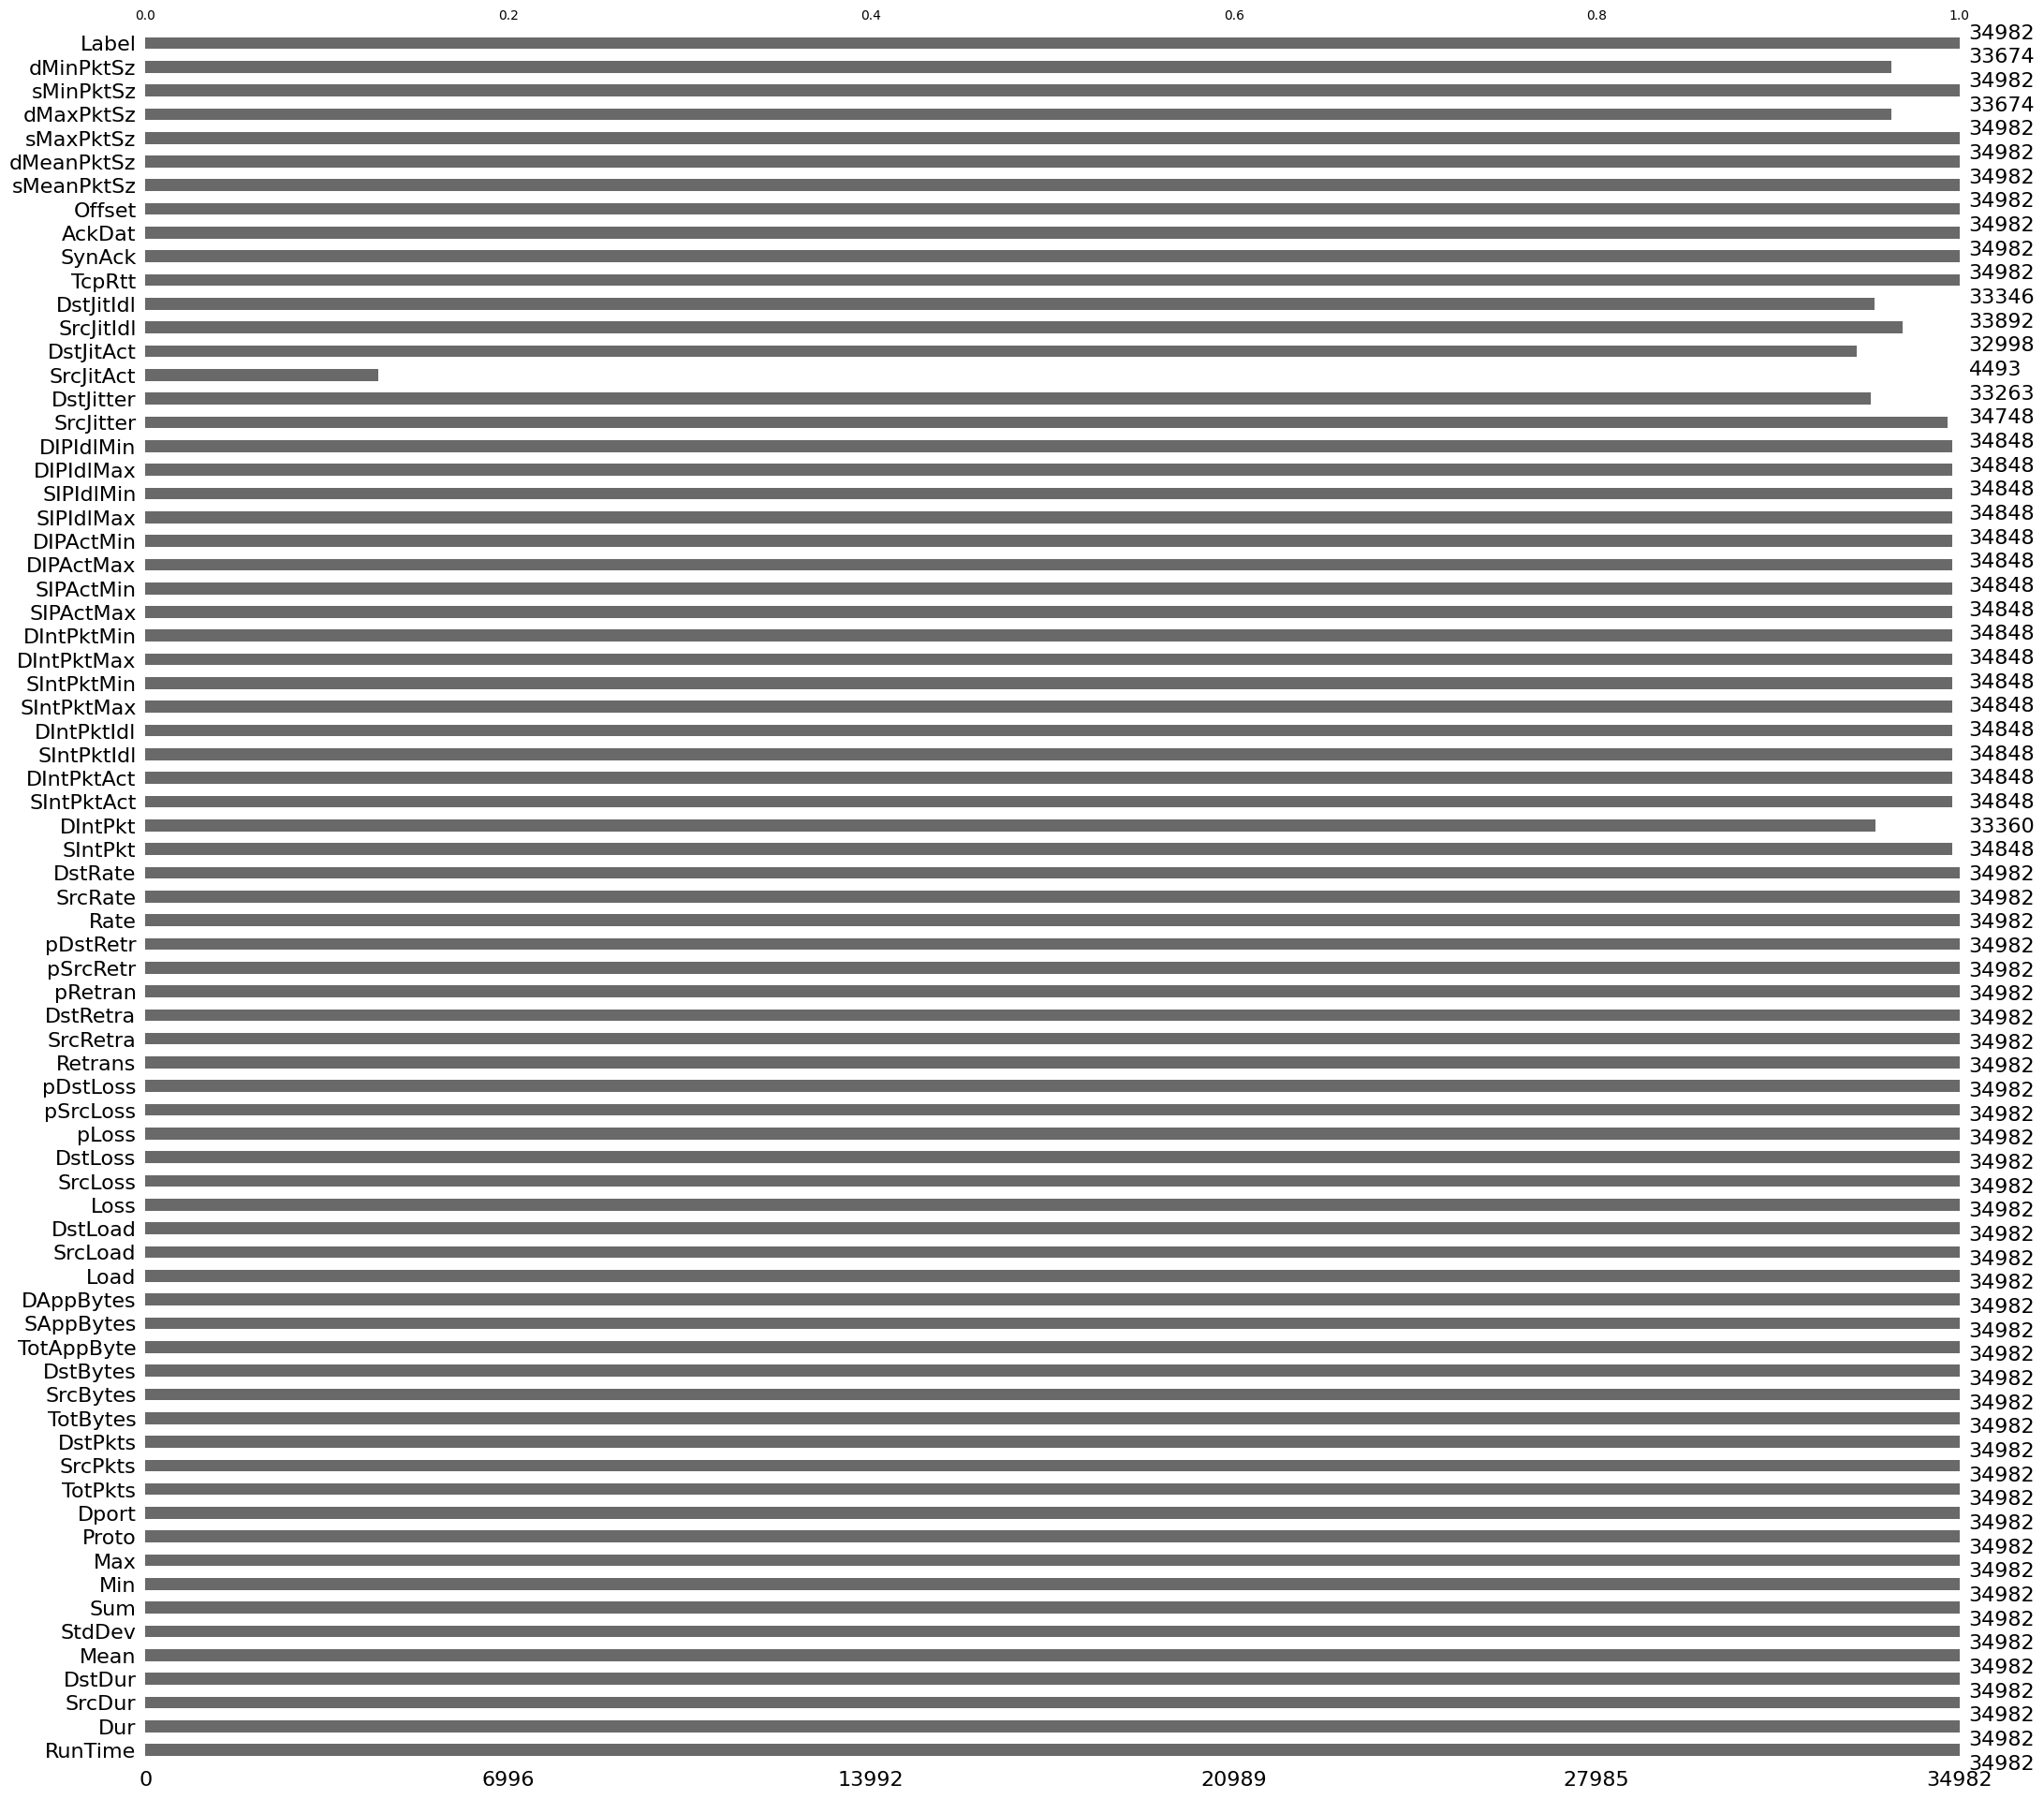

In [30]:
msno.bar(df_dos)

En este los atributos basados en actividad de paquetes y fluctuacion se encuentran con datos tratables para aplicar tecnicas de imputacion. Sin embargo al tener esta con la mayor cantidad de datos sin faltantes, a diferencia de la clase probe y normal, se procede a eliminar estas caracteristicas para tener la misma dimension.

#### Eliminar valores faltantes y caracteristicas que no permanecieron en las otras clases

In [31]:
"""caracteristicas con datos faltantes en otras clases, probe y normal"""
faltantes=['SIntPkt','DIntPkt','SIntPktAct','DIntPktAct','SIntPktIdl','DIntPktIdl',
'SIntPktMax','SIntPktMin','DIntPktMax','DIntPktMin','SIPActMax'
,'SIPActMin','DIPActMax','DIPActMin','SIPIdlMax','SIPIdlMin','DIPIdlMax','DIPIdlMin'
,'SrcJitter','DstJitter','SrcJitAct','DstJitAct','SrcJitIdl','DstJitIdl']

In [32]:
df_dos.drop(columns=faltantes, axis=1, inplace=True)

<AxesSubplot: >

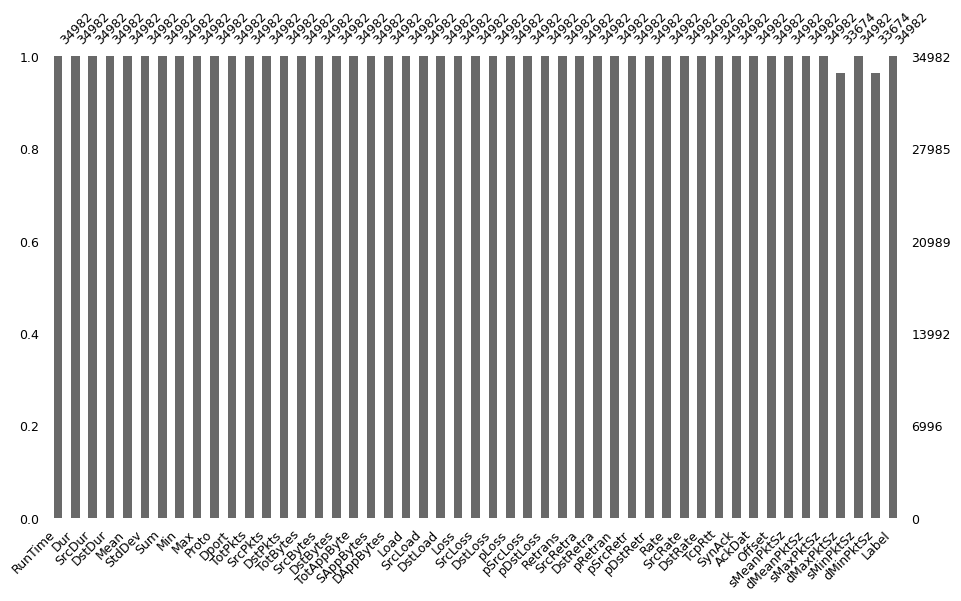

In [33]:
msno.bar(df_dos, figsize=(11,6), fontsize=9)

#### Imputacion de datos faltantes
Se analiza la cantidad de paquetes, bytes por destino y origen, asi como el promedio, el minimo y maximo del tamaño de paquetes.

In [34]:
"""Imputacion de datos"""
im_sd_maxminpktz=SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0.0)
im_sd_maxminpktz=im_sd_maxminpktz.fit(df_dos[['dMaxPktSz']])
df_dos['dMaxPktSz'] = im_sd_maxminpktz.transform(df_dos[['dMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_dos[['dMinPktSz']])
df_dos['dMinPktSz'] = im_sd_maxminpktz.transform(df_dos[['dMinPktSz']])

<AxesSubplot: >

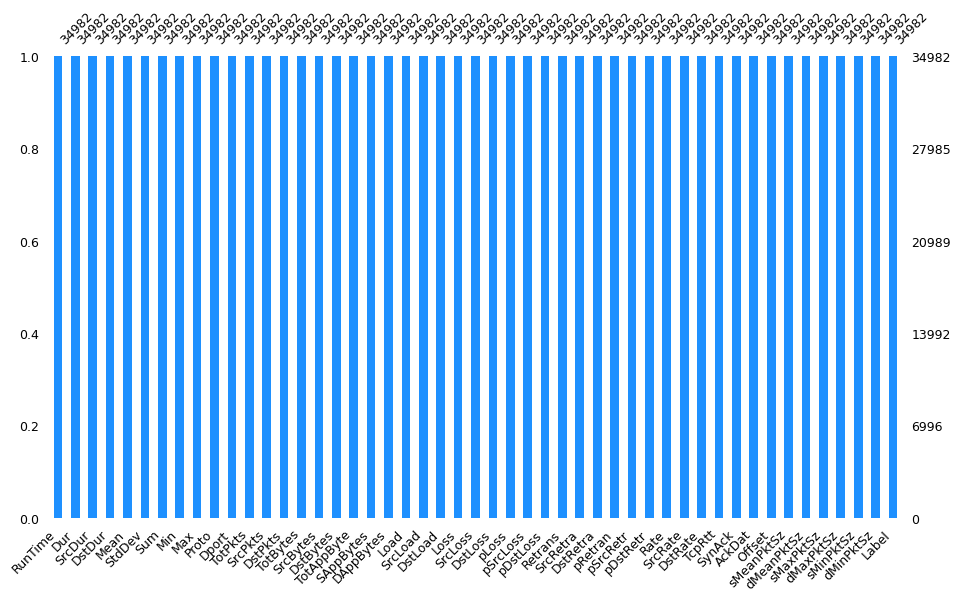

In [35]:
msno.bar(df_dos, figsize=(11,6), fontsize=9, color="dodgerblue")

# 3. Valores atípicos
Se analizan posibles valores atípicos

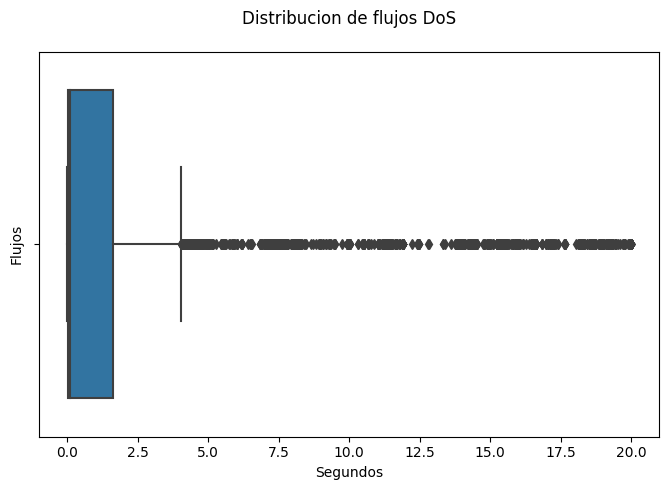

In [36]:
"""crear boxplot"""
plt.subplots(figsize=(8, 5))
ax = sns.boxplot(x = df_dos.Dur)
ax.set_xlabel("Segundos", fontsize = 10)
ax.set_ylabel("Flujos", fontsize = 10)
ax.set_title("Distribucion de flujos DoS", fontsize =12, pad = 20)
plt.show()

La mayoria de las muestras se encuentra en un intervalo superior a 0.0 segundos e inferior a 2.5 segundos. Muchas muestras contienen valores superiores a 5 segundos que corresponden al cuarto cuartil.

In [37]:
df_dos.describe()

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,TotPkts,...,TcpRtt,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz
count,34982.000000,34982.000000,34982.000000,34982.000000,34982.000000,34982.0,34982.000000,34982.000000,34982.000000,34982.000000,...,34982.000000,34982.000000,34982.000000,3.498200e+04,34982.000000,34982.000000,34982.000000,34982.000000,34982.000000,34982.000000
mean,1.347876,1.347876,1.347577,0.259173,1.347876,0.0,1.347876,1.347876,1.347876,45.250729,...,0.020292,0.000010,0.020282,2.101056e+06,114.294852,363.153664,305.999628,1227.161169,67.940941,61.322680
std,2.949851,2.949851,2.948658,1.490594,2.949851,0.0,2.949851,2.949851,2.949851,1120.723226,...,0.033666,0.000013,0.033667,1.495764e+06,69.486367,167.001924,599.163693,689.691515,32.004574,12.999935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.280000e+02,61.200001,0.000000,66.000000,0.000000,54.000000,0.000000
25%,0.028173,0.028173,0.028160,0.019103,0.028173,0.0,0.028173,0.028173,0.028173,12.000000,...,0.006977,0.000004,0.006965,8.776560e+05,70.166664,379.666656,83.000000,1514.000000,66.000000,66.000000
50%,0.101748,0.101748,0.101598,0.029872,0.101748,0.0,0.101748,0.101748,0.101748,12.000000,...,0.013333,0.000007,0.013325,1.836692e+06,110.333336,382.666656,353.000000,1514.000000,66.000000,66.000000
75%,1.631028,1.631028,1.631028,0.058587,1.631028,0.0,1.631028,1.631028,1.631028,13.000000,...,0.025475,0.000012,0.025466,3.089897e+06,125.333336,534.799988,414.000000,1514.000000,66.000000,66.000000
max,19.999994,19.999994,19.999973,19.999933,19.999994,0.0,19.999994,19.999994,19.999994,100777.000000,...,1.232839,0.000500,1.232833,5.608788e+06,3466.000000,1244.434814,65226.000000,59434.000000,754.000000,83.000000


El valor maximo de la duracion del flujo en DoS es de 19.999994 segundos, el minimo 0.0 y el promedio de aproximadamente de 0.10 decisegundos. Segun las estadisticas los valores que se encuentran fuera del primer y cuarto cuartil se pueden considerar como valores atipicos. En este caso, no se tratara como outliers puesto que la extraccion de los flujos fue considerar a un valor maximo de 20 segundos.

In [40]:
df_dos.to_csv('../../araDataFin/limpieza_fase2/limpieza_dos_3ValoresAtipicos.csv',index=False)

Hasta aqui guardé los datos. Estan protocolos UDP y TCP porque DoS solo contiene 2 muestras de ICMP y anteriormente se las elimino.

# 4. Codificacion de etiquetas

Solo se trabaja en L4

#### Codificar Protocolos

In [42]:
df_dos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34982 entries, 1 to 35028
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     34982 non-null  float64
 1   Dur         34982 non-null  float64
 2   SrcDur      34982 non-null  float64
 3   DstDur      34982 non-null  float64
 4   Mean        34982 non-null  float64
 5   StdDev      34982 non-null  float64
 6   Sum         34982 non-null  float64
 7   Min         34982 non-null  float64
 8   Max         34982 non-null  float64
 9   Proto       34982 non-null  object 
 10  Dport       34982 non-null  object 
 11  TotPkts     34982 non-null  int64  
 12  SrcPkts     34982 non-null  int64  
 13  DstPkts     34982 non-null  int64  
 14  TotBytes    34982 non-null  int64  
 15  SrcBytes    34982 non-null  int64  
 16  DstBytes    34982 non-null  int64  
 17  TotAppByte  34982 non-null  int64  
 18  SAppBytes   34982 non-null  int64  
 19  DAppBytes   34982 non-nul

Atributos no numericos: Proto(ordinal), Dport(ordinal), Label(ordinal-nominal)

In [45]:
df_dos.Proto.unique()

array(['tcp', 'udp'], dtype=object)

In [46]:
df_dos.Proto.replace({'tcp':6, 'udp':17},inplace=True )

#### Codificando Puertos

In [47]:
df_dos.Dport.unique()

array(['http', '40532', '6653', '1900', '40634', 'mdns', 'hostmon', '80',
       '48312', '48312.0', '6653.0', '48308'], dtype=object)

In [55]:
df_dos.Dport.replace({'http':80, '80':80, '40532':40532, '6653':6653, '1900':1900,'mdns':5353 ,'40634':40634,'48312.0':48312, '48312':48312,
'6653.0':6653, 'hostmon':5355, '48308':48308},inplace=True )

In [56]:
df_dos.Dport.unique()

array([   80, 40532,  6653,  1900, 40634,  5353,  5355, 48312, 48308],
      dtype=int64)

In [57]:
df_dos.Dport.value_counts()

80       34880
6653        84
1900         7
40634        4
40532        2
48312        2
5353         1
5355         1
48308        1
Name: Dport, dtype: int64

In [58]:
df_dos.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34982 entries, 1 to 35028
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     34982 non-null  float64
 1   Dur         34982 non-null  float64
 2   SrcDur      34982 non-null  float64
 3   DstDur      34982 non-null  float64
 4   Mean        34982 non-null  float64
 5   StdDev      34982 non-null  float64
 6   Sum         34982 non-null  float64
 7   Min         34982 non-null  float64
 8   Max         34982 non-null  float64
 9   Proto       34982 non-null  int64  
 10  Dport       34982 non-null  int64  
 11  TotPkts     34982 non-null  int64  
 12  SrcPkts     34982 non-null  int64  
 13  DstPkts     34982 non-null  int64  
 14  TotBytes    34982 non-null  int64  
 15  SrcBytes    34982 non-null  int64  
 16  DstBytes    34982 non-null  int64  
 17  TotAppByte  34982 non-null  int64  
 18  SAppBytes   34982 non-null  int64  
 19  DAppBytes   34982 non-nul

#### Codificar etiqueta Label

No se realiza la codificacion de esta etiqueta, se realizara al momento de concatenar todas las clases.



Se procede a guardar los datos ya codificados.

In [ ]:
df_dos.to_csv('../../araDataFin/limpieza_fase2/dos_4.csv',index=False)

# MODIFICANDO

In [2]:
"""importando flujos limpios"""
df_dos = pd.read_csv('../../araData/Z/dos_1.7sincategorizar.csv', low_memory=False)
df_dos.shape

(34285, 52)